## Import libraries

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from surprise import Reader, Dataset,accuracy,SVD,dump
from surprise.model_selection import train_test_split,cross_validate,GridSearchCV
from collections import defaultdict
import seaborn as sns


## Extract Data

In [20]:
df=pd.read_csv('song_dataset.csv',sep=',')

# Explore Data

In [21]:
df.head()

,user,song,play_count,title,release,artist_name,year
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1,The Cove,Thicker Than Water,Jack Johnson,0
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAPDEY12A81C210A9,1,Nothing from Nothing,To Die For,Billy Preston,1974
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2,Entre Dos Aguas,Flamenco Para Niños,Paco De Lucia,1976
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBFNSP12AF72A0E22,1,Under Cold Blue Stars,Under Cold Blue Stars,Josh Rouse,2002
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBFOVM12A58A7D494,1,Riot Radio (Soundtrack Version),Nick & Norah's Infinite Playlist - Original Mo...,The Dead 60s,0


In [22]:
df1=df.copy()

In [23]:
#Dimension of the dataset
df1.shape

(102627, 7)

In [24]:
#Get information about the dataset
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102627 entries, 0 to 102626
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   user         102627 non-null  object
 1   song         102627 non-null  object
 2   play_count   102627 non-null  int64 
 3   title        102627 non-null  object
 4   release      102627 non-null  object
 5   artist_name  102627 non-null  object
 6   year         102627 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 5.5+ MB


In [25]:
#Check missing values 
df1.isnull().sum()

user           0
song           0
play_count     0
title          0
release        0
artist_name    0
year           0
dtype: int64

In [26]:
df1.describe()

,play_count,year
count,102627.000000,102627.000000
mean,2.885790,1624.812389
std,8.569376,781.595402
min,1.000000,0.000000
25%,1.000000,1984.000000
50%,1.000000,2002.000000
75%,3.000000,2007.000000
max,1890.000000,2010.000000


In [27]:
#Number of songs ans users 
print(f"Number of songs : +{len(df1['song'].unique())}")
print(f"Number of users : +{len(df1['user'].unique())}")


Number of songs : +44458
Number of users : +2042


## Most listend songs

In [28]:
top_songs=df1[['title','play_count']].groupby('title').sum().sort_values(by=['play_count'],ascending=False).head(10)

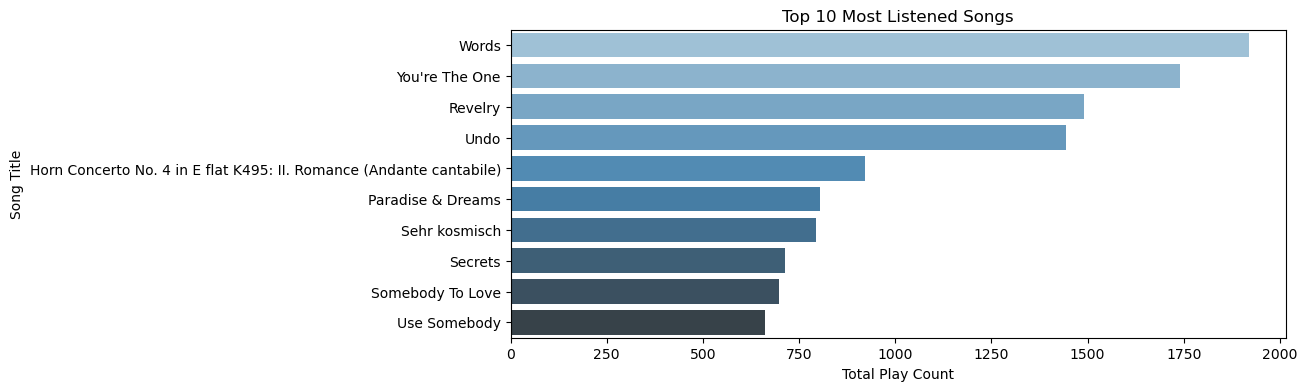

In [29]:
# Plotting the top 10 most listened songs
plt.figure(figsize=(10, 4))
sns.barplot(x=top_songs['play_count'], y=top_songs.index.get_level_values('title'), palette="Blues_d")
plt.xlabel('Total Play Count')
plt.ylabel('Song Title')
plt.title('Top 10 Most Listened Songs')
plt.show()



## Most popular artists

In [30]:
top_artists=df1[['artist_name','play_count']].groupby('artist_name').count().sort_values(by=['play_count'],ascending=False).head(10)


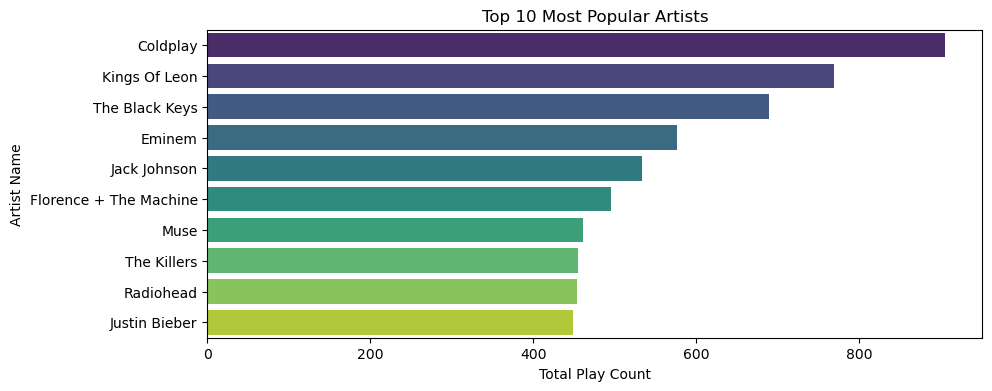

In [31]:
# Plotting the top 10 most popular artists
plt.figure(figsize=(10, 4))
sns.barplot(x=top_artists['play_count'], y=top_artists.index, palette="viridis")
plt.xlabel('Total Play Count')
plt.ylabel('Artist Name')
plt.title('Top 10 Most Popular Artists')
plt.show()

## Distribution of song count for users

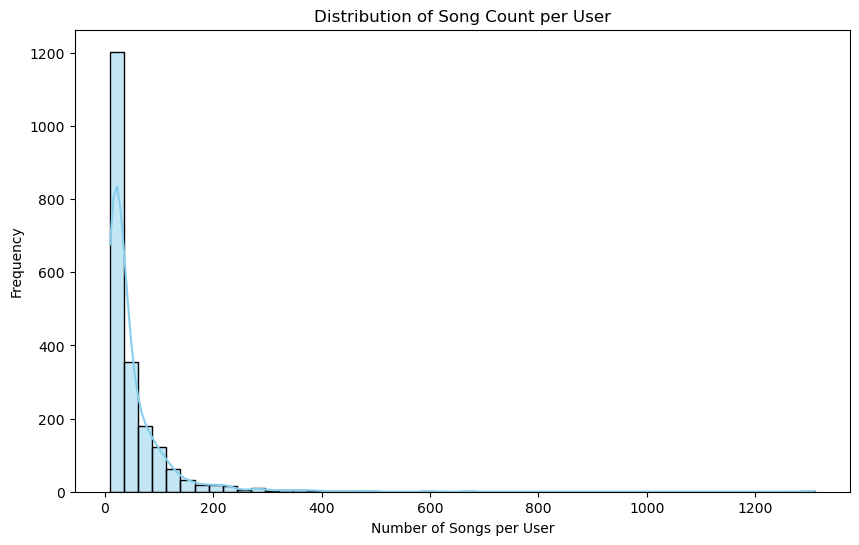

,song_count
count,2042.000000
mean,50.258080
std,65.800267
min,10.000000
25%,17.000000
50%,29.000000
75%,58.000000
max,1309.000000


In [32]:
# Analyzing the distribution of song count per user
user_song_counts = df1.groupby('user').agg(song_count=pd.NamedAgg(column='song', aggfunc='count'))

# Plotting the distribution of song count per user
plt.figure(figsize=(10, 6))
sns.histplot(user_song_counts['song_count'], bins=50, kde=True, color='skyblue')
plt.xlabel('Number of Songs per User')
plt.ylabel('Frequency')
plt.title('Distribution of Song Count per User')
plt.show()

user_song_counts.describe()

In [33]:
df2=df1.copy()

In [34]:
df2

,user,song,play_count,title,release,artist_name,year
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1,The Cove,Thicker Than Water,Jack Johnson,0
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAPDEY12A81C210A9,1,Nothing from Nothing,To Die For,Billy Preston,1974
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2,Entre Dos Aguas,Flamenco Para Niños,Paco De Lucia,1976
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBFNSP12AF72A0E22,1,Under Cold Blue Stars,Under Cold Blue Stars,Josh Rouse,2002
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBFOVM12A58A7D494,1,Riot Radio (Soundtrack Version),Nick & Norah's Infinite Playlist - Original Mo...,The Dead 60s,0
...,...,...,...,...,...,...,...
102622,21f4ac98aa1665bd42027ba12184a939ff435f59,SOKAKHH12AF72A5BAF,3,87,Hopeless Romantic,Bouncing Souls,1999
102623,21f4ac98aa1665bd42027ba12184a939ff435f59,SONPOXM12A8C1440C2,4,Space Olympics,Incredibad,The Lonely Island,2009
102624,21f4ac98aa1665bd42027ba12184a939ff435f59,SOPREHY12AB01815F9,8,I'm On A Boat,Incredibad,The Lonely Island / T-Pain,2009
102625,21f4ac98aa1665bd42027ba12184a939ff435f59,SOQXKUV12A6D4FB4C9,3,Amityville,The Marshall Mathers LP,Eminem / Bizarre,2000


## User_Item_Matrix

In [35]:
df_unique = df1.drop_duplicates(subset=['user', 'song'])
user_item_matrix = df_unique.pivot(index='user', columns='song', values='play_count').fillna(0)

In [36]:
user_item_matrix

song,SOAAAGQ12A8C1420C8,SOAABMP12A6D4F7633,SOAABVA12AC3DF673F,SOAACPJ12A81C21360,SOAACTC12AB0186A20,SOAADCB12A81C22AFA,SOAAEJI12AB0188AB5,SOAAEKX12A6D4F7E4E,SOAAFAC12A67ADF7EB,SOAAFBZ12AB01842D7,...,SOZZWTD12AF72A4FA1,SOZZWZV12A67AE140F,SOZZXAO12A58A7D379,SOZZXOX12A8AE47ED6,SOZZXZP12AB0180443,SOZZYAO12A6701FF36,SOZZYDA12AB01824FB,SOZZYMH12AB0180A51,SOZZZBY12A8C139058,SOZZZFB12A8AE45CDC
user,,,,,,,,,,,,,,,,,,,,,
0007c0e74728ca9ef0fe4eb7f75732e8026a278b,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
000ebc858861aca26bac9b49f650ed424cf882fc,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
00342a0cdf56a45465f09a39040a5bc25b7d0046,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0039bd8483d578997718cdc0bf6c7c88b679f488,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
00498f4bab2bfeb17680113c7d9525ad5b0ad401,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ffa24617ea80c268c74e86cd3ee3d9e7ac5504ec,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ffadf9297a99945c0513cd87939d91d8b602936b,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ffdaab327f2fc6b9fa01a4e3e7f41fdd0e468046,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [37]:
# Calculate the number of songs not listened to by each user
not_listened_counts = user_item_matrix.apply(lambda row: len(row[row == 0]), axis=1)
not_listened_counts

user
0007c0e74728ca9ef0fe4eb7f75732e8026a278b    44445
000ebc858861aca26bac9b49f650ed424cf882fc    43980
00342a0cdf56a45465f09a39040a5bc25b7d0046    44365
0039bd8483d578997718cdc0bf6c7c88b679f488    44394
00498f4bab2bfeb17680113c7d9525ad5b0ad401    44442
                                            ...  
ffa24617ea80c268c74e86cd3ee3d9e7ac5504ec    44419
ffadf9297a99945c0513cd87939d91d8b602936b    44430
ffdaab327f2fc6b9fa01a4e3e7f41fdd0e468046    44058
ffe50146303f1b12ea8254450b95580b1b99a5c4    44445
fffce9c1537fbc350ea68823d956eaa8f5236dbe    44404
Length: 2042, dtype: int64


* Upon generating the user-item matrix for our recommendation system, we found that the matrix displayed a high level of disparity. This means that there was a significant variation in the listening habits across different users, with many songs not being listened to by a majority of users. High disparity in the user-item matrix can be challenging for collaborative filtering algorithms, as it may lead to a sparsity problem where there are not enough overlapping listening events between users to accurately predict preferences. This condition necessitates more sophisticated techniques or the incorporation of additional information to enhance the recommendation process.

## Prepare Data

In [38]:
# Get how many songs each user have listened to
user_counts = df1.groupby('user')['song'].count()

# Filter users which have listen to at least 10 songs
user_ten_id = user_counts[user_counts > 10].index.to_list()

In [39]:
# Get how many user have listened to each song
song_counts = df1.groupby('song')['user'].count()

# Get songs which have been listened at least 3 times
song_ten_id = song_counts[song_counts > 3].index.to_list()

In [40]:
# Filtered the dataset to keep only those users with more than 10 listened
df_song_reduced = df1[(df1['user'].isin(user_ten_id)) & (df1['song'].isin(song_ten_id))].reset_index()

In [41]:
df_song_reduced.shape


(49618, 8)

In [42]:
bins = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 2214]


In [43]:
df_song_reduced['play_count'] = pd.cut(df_song_reduced['play_count'], bins=bins, labels=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10])


In [44]:
listen_counts = pd.DataFrame(df_song_reduced.groupby('play_count').size(), columns=['count']).reset_index(drop=False)


In [45]:
listen_counts

,play_count,count
0,1,28658
1,2,7706
2,3,3576
3,4,1903
4,5,2152
5,6,1163
6,7,759
7,8,529
8,9,411
9,10,2761


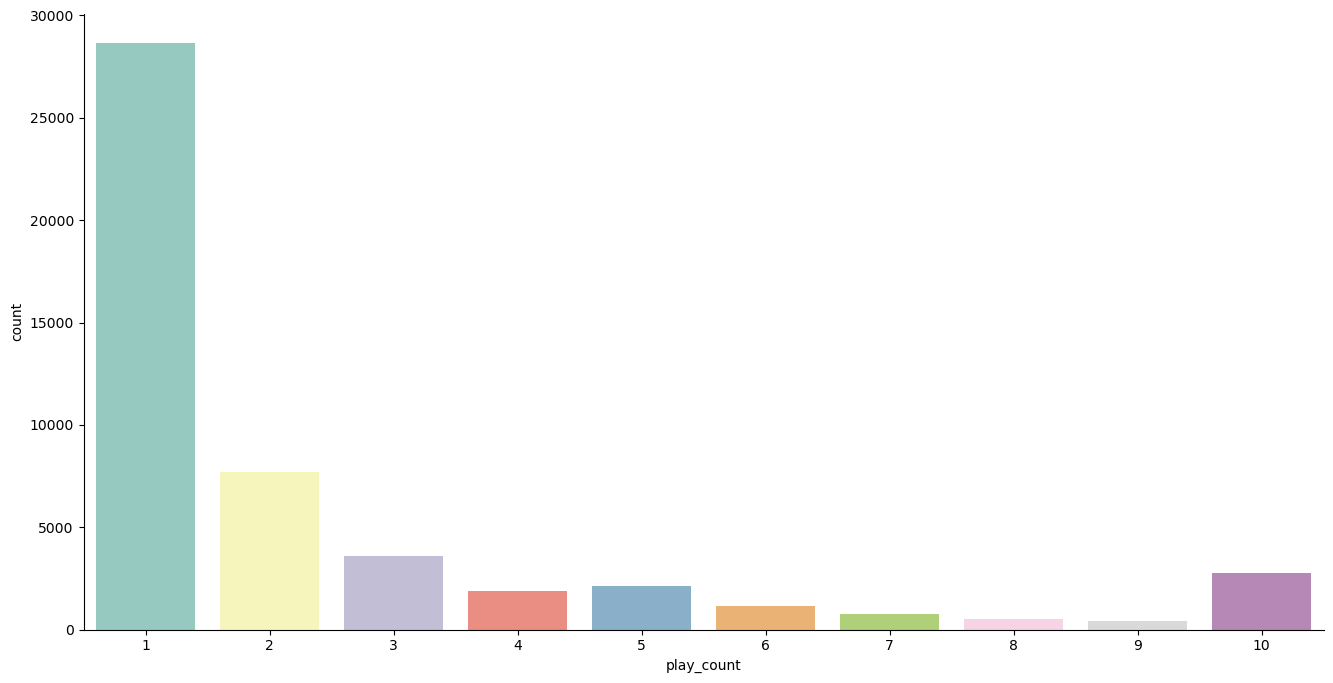

In [46]:
plt.figure(figsize=(16, 8))
sns.barplot(x='play_count', y='count', palette='Set3', data=listen_counts)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show();

In [47]:
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(df_song_reduced[['user', 'song', 'play_count']], reader)


# Train model 

In [48]:
trainset, testset = train_test_split(data, test_size=.25)


## Hypertuning

In [49]:
param_grid = {'n_factors': [160], 
              'n_epochs': [100], 
              'lr_all': [0.001, 0.005],
              'reg_all': [0.08, 0.1]}

In [50]:
#Using GridSearch to find best parameters
grid_search_svd = GridSearchCV(SVD, param_grid, measures=['rmse'], cv=3, joblib_verbose=4, n_jobs=-2)


In [51]:
# find the best parameters for the model
grid_search_svd.fit(data)
find_algo = grid_search_svd.best_estimator['rmse']
print(grid_search_svd.best_score['rmse'])
print(grid_search_svd.best_params['rmse'])

[Parallel(n_jobs=-2)]: Using backend LokyBackend with 3 concurrent workers.


2.1992119848159355
{'n_factors': 160, 'n_epochs': 100, 'lr_all': 0.001, 'reg_all': 0.1}


[Parallel(n_jobs=-2)]: Done  12 out of  12 | elapsed:   26.5s finished


## Evaluate the model

In [52]:
# Perform the cross validation
cross_validate(find_algo, data, measures=['RMSE'], cv=5, verbose=True)

Evaluating RMSE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    2.1780  2.2008  2.2201  2.1774  2.1339  2.1820  0.0288  
Fit time          4.83    5.25    5.23    4.60    4.47    4.88    0.32    
Test time         0.08    0.15    0.09    0.09    0.12    0.11    0.02    


{'test_rmse': array([2.17796293, 2.20083968, 2.22005681, 2.17739298, 2.13391174]),
 'fit_time': (4.834278106689453,
  5.250964879989624,
  5.2306969165802,
  4.603642702102661,
  4.472877264022827),
 'test_time': (0.08115339279174805,
  0.14791083335876465,
  0.09092187881469727,
  0.09112310409545898,
  0.12132024765014648)}

In [53]:
final_algorithm = SVD(n_factors=160, n_epochs=100, lr_all=0.005, reg_all=0.8)
final_algorithm.fit(trainset)
test_predictions = final_algorithm.test(testset)
print(f"The RMSE is {accuracy.rmse(test_predictions, verbose=True)}")

RMSE: 2.1862
The RMSE is 2.186171143359728


In [54]:
def get_top_n(predictions, n=10):
    # First map the predictions to each user.
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))

    # Then sort the predictions for each user and retrieve the n highest ones.
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]

    return top_n

# Predict ratings for all pairs (u, i) that are NOT in the training set
testset = trainset.build_anti_testset()
predictions = final_algorithm.test(testset)

'''----------------------------------------------------------------------------------------------------------------------------
# Get and print top-N recommendations for each user
top_n = get_top_n(predictions, n=5)
for uid, user_ratings in top_n.items():
    print(uid, [iid for (iid, _) in user_ratings])
'''


'----------------------------------------------------------------------------------------------------------------------------\n# Get and print top-N recommendations for each user\ntop_n = get_top_n(predictions, n=5)\nfor uid, user_ratings in top_n.items():\n    print(uid, [iid for (iid, _) in user_ratings])\n'

In [55]:
# Get and print list of recomandations
top_n = get_top_n(predictions, n=1)
for uid, user_ratings in top_n.items():
    #user_id shoulf be an input selected by the
    if uid=="21f4ac98aa1665bd42027ba12184a939ff435f59":
        #obtenir le nom de la music la plus populaire
        out_f=df1[df1['song']==user_ratings[0][0]]['title'].iloc[0] 
        #here for out_f shoulf be a text in the plateforme
        print(out_f)
        break;


Lesson Learned


# Save the model

In [56]:
# Specify the file path where you want to save the model
model_file_path = 'recommandation_model.pkl'

# Save the trained model to the file
dump.dump(model_file_path, predictions)

## Load the model

In [57]:
file_name = 'recommandation_model.pkl'  
predictions, algo = dump.load(file_name)